# Задание

In [24]:
# from google.colab import drive
# drive.mount('/content/drive')

### Основная часть

* Попробовать построить графики из тех, что были на уроке по Seaborn и Matplotlib
* Важно чтобы у каждого из графиков был как минимум один в комментариях или markdown

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

# скачиваем датасет

In [19]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Xankd_YIM2ufCvUiCWk4qPm0j7um2mT8' -O test_cluster.csv

--2022-04-30 06:49:18--  https://docs.google.com/uc?export=download&id=1Xankd_YIM2ufCvUiCWk4qPm0j7um2mT8
Resolving docs.google.com (docs.google.com)... 173.194.213.139, 173.194.213.138, 173.194.213.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.213.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nbi4aqoanjl0aojbt307fq141vugob2o/1651301325000/10585460637973507923/*/1Xankd_YIM2ufCvUiCWk4qPm0j7um2mT8?e=download [following]
--2022-04-30 06:49:19--  https://doc-10-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nbi4aqoanjl0aojbt307fq141vugob2o/1651301325000/10585460637973507923/*/1Xankd_YIM2ufCvUiCWk4qPm0j7um2mT8?e=download
Resolving doc-10-90-docs.googleusercontent.com (doc-10-90-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-10-90-docs.googleusercontent.com (doc-10-90-docs

In [20]:
!ls


 sample_data	   'view?usp=sharing'	 'view?usp=sharing.2'
 test_cluster.csv  'view?usp=sharing.1'  'view?usp=sharing.3'


In [22]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df
# .head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.0000,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3272.9367,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6249.7550,6,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,14354.9370,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,91511.7691,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,F,<100,97,0.0,0.0,0.00,1247018.0,0.8800,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,13775.933155
49996,58,F,Mega,34,0.0,0.0,0.00,1000000.0,0.0000,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,8247.466438
49997,34,М,1M+,21,0.0,0.0,0.00,0.0,6450.9300,73,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128710
49998,43,М,<100,52,0.0,0.0,39318.52,0.0,4101.1200,0,...,39318.52,48453.57,63442.406667,0.0,0.0,0.0,NaN,NaN,NaN,5101.543269


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

# смотрим распределение значений

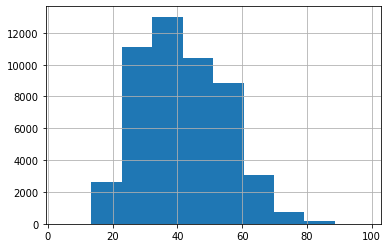

In [27]:
df['age'].hist()

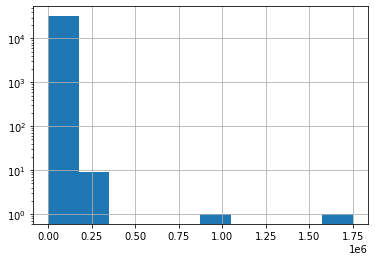

In [32]:

df['Avg_trx'].hist(log=True)

# смотим разброс минимум-максимум по колонке "возраст"

In [45]:
df['age'].min(), df['age'].max()

(4, 98)

In [46]:
df['age'].value_counts()

33    1571
31    1561
35    1545
34    1534
32    1508
      ... 
98       1
13       1
9        1
4        1
10       1
Name: age, Length: 84, dtype: int64

# разбиваем на 10 кластеров по возрасту, равномерно, от минимума, до максимума

In [40]:
N_BINS = 10
N_BINS

10

In [47]:
df['age_bin'] = ((N_BINS * df['age']) / df['age'].max()).astype(int)
df

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,income_bin,age_bin
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.0000,0,...,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,7
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3272.9367,0,...,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952,0,5
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6249.7550,6,...,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539,0,5
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,14354.9370,0,...,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556,0,4
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,91511.7691,0,...,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,F,<100,97,0.0,0.0,0.00,1247018.0,0.8800,0,...,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,13775.933155,0,5
49996,58,F,Mega,34,0.0,0.0,0.00,1000000.0,0.0000,0,...,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,8247.466438,0,5
49997,34,М,1M+,21,0.0,0.0,0.00,0.0,6450.9300,73,...,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128710,0,3
49998,43,М,<100,52,0.0,0.0,39318.52,0.0,4101.1200,0,...,63442.406667,0.0,0.0,0.0,NaN,NaN,NaN,5101.543269,0,4


# смотрим распределение среднего дохода по кластерам возраста

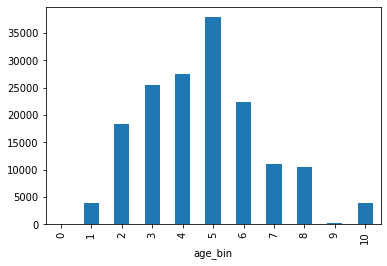

In [64]:
df.groupby(by=['age_bin'])['income'].mean().plot.bar()


# посмотрим тройное распределение возраст-доход-пол

In [69]:
df['income'].sort_values()

0               0.00
28278           0.00
28275           0.00
28274           0.00
28273           0.00
            ...     
9017      3216499.65
22278     4107734.49
23233     5000000.00
8315     33063482.00
45169    90600000.00
Name: income, Length: 50000, dtype: float64

In [70]:
df_not_null = df[df['income'] > 0]
df_not_null

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,income_bin,age_bin
9,36,М,<100,154,0.0,0.0,32413.52,0.0,0.00,83,...,38051.374167,0.0,0.0,0.0,NaN,3915.032892,4.383411,6065.052515,0,3
10,56,F,<100,165,0.0,0.0,61189.99,70000.0,1524.58,341,...,43218.413333,0.0,0.0,0.0,0.617406,1323.992698,0.226536,8009.940315,0,5
11,19,М,100-500,40,0.0,0.0,0.00,0.0,19.65,72,...,0.000000,0.0,0.0,0.0,NaN,215.688611,0.992718,684.233442,0,1
12,20,F,1M+,3,0.0,0.0,0.00,0.0,10338.17,105,...,0.000000,0.0,0.0,0.0,NaN,1202.188857,0.063129,157.694118,0,2
13,51,М,100-500,37,0.0,0.0,0.00,0.0,8738.12,189,...,0.000000,0.0,0.0,0.0,NaN,4145.593968,0.130954,3054.122311,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,59,М,500-1000,51,0.0,0.0,0.00,0.0,42517.23,299,...,0.000000,0.0,0.0,0.0,NaN,3181.043378,0.118275,4860.966928,0,6
49988,18,F,100-500,3,0.0,0.0,0.00,0.0,1597.00,6,...,0.000000,0.0,0.0,0.0,NaN,635.166667,0.792720,235.775991,0,1
49993,45,F,<100,6,0.0,0.0,0.00,0.0,2679.18,195,...,0.000000,0.0,0.0,0.0,NaN,518.029436,0.126364,743.773765,0,4
49997,34,М,1M+,21,0.0,0.0,0.00,0.0,6450.93,73,...,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128710,0,3


In [74]:
np.log(df_not_null['income']).value_counts()

3.912023     103
10.819778     90
11.002100     83
10.714418     82
10.463103     81
            ... 
11.052356      1
12.554458      1
12.958210      1
9.990903       1
10.575444      1
Name: income, Length: 19629, dtype: int64

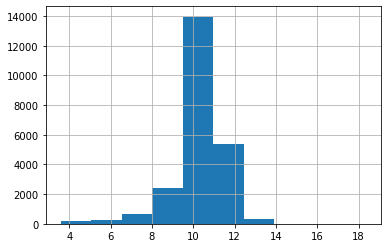

In [76]:
np.log(df_not_null['income']).hist()

In [80]:
df_not_null['gender'].value_counts()

F    11943
М    10933
Name: gender, dtype: int64

In [87]:
gender_dict = {key: index for index, key in enumerate(df_not_null['gender'].unique())}
gender_dict

{'F': 1, nan: 2, 'М': 0}

In [89]:
df_not_null['gender_num'] = df_not_null['gender'].apply(lambda x: gender_dict[x])
df_not_null

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,income_bin,age_bin,gender_num
9,36,М,<100,154,0.0,0.0,32413.52,0.0,0.00,83,...,0.0,0.0,0.0,NaN,3915.032892,4.383411,6065.052515,0,3,0
10,56,F,<100,165,0.0,0.0,61189.99,70000.0,1524.58,341,...,0.0,0.0,0.0,0.617406,1323.992698,0.226536,8009.940315,0,5,1
11,19,М,100-500,40,0.0,0.0,0.00,0.0,19.65,72,...,0.0,0.0,0.0,NaN,215.688611,0.992718,684.233442,0,1,0
12,20,F,1M+,3,0.0,0.0,0.00,0.0,10338.17,105,...,0.0,0.0,0.0,NaN,1202.188857,0.063129,157.694118,0,2,1
13,51,М,100-500,37,0.0,0.0,0.00,0.0,8738.12,189,...,0.0,0.0,0.0,NaN,4145.593968,0.130954,3054.122311,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,59,М,500-1000,51,0.0,0.0,0.00,0.0,42517.23,299,...,0.0,0.0,0.0,NaN,3181.043378,0.118275,4860.966928,0,6,0
49988,18,F,100-500,3,0.0,0.0,0.00,0.0,1597.00,6,...,0.0,0.0,0.0,NaN,635.166667,0.792720,235.775991,0,1,1
49993,45,F,<100,6,0.0,0.0,0.00,0.0,2679.18,195,...,0.0,0.0,0.0,NaN,518.029436,0.126364,743.773765,0,4,1
49997,34,М,1M+,21,0.0,0.0,0.00,0.0,6450.93,73,...,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128710,0,3,0


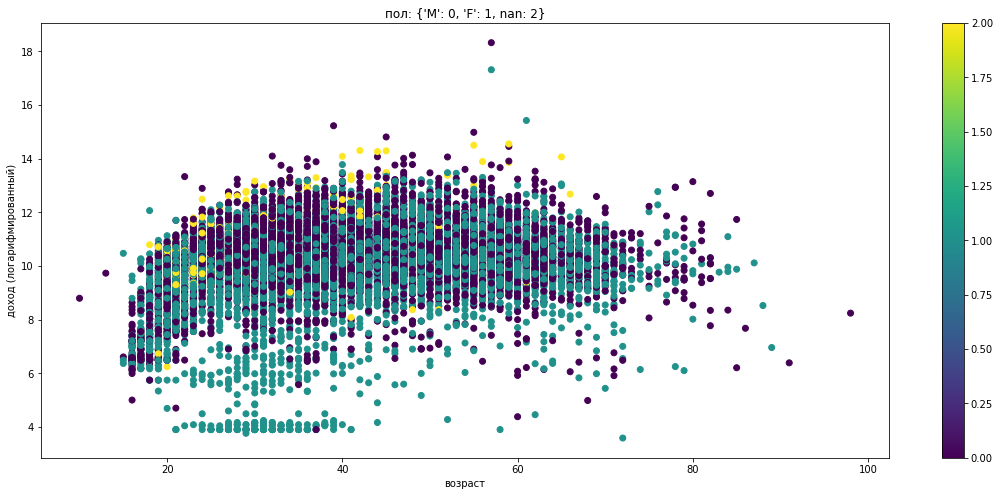

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(19, 8))

ax.set_title('пол: {}'.format(str(gender_dict)))
ax.set_xlabel('возраст')
ax.set_ylabel('доход (логарифмированный)')

sc = ax.scatter(x=df_not_null['age'], y=np.log(df_not_null['income']), c=df_not_null['gender_num'])

plt.colorbar(sc)
plt.show()